In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetic_data.csv")
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# drop columns not needed
df[df == "?"] = np.nan
df = df.drop(["encounter_id","weight", "medical_specialty","patient_nbr"],axis=1)

In [4]:
def binary_readmitted(elem):
    if(elem == "<30"):
        return 1
    return 0
df["readmitted"] = df["readmitted"].apply(binary_readmitted)

In [5]:
string_columns = [
    "race",
    "gender",
    "age",
    "max_glu_serum",
    "A1Cresult",
    "metformin",
    "repaglinide",
    "payer_code",
    "diag_1",
    "diag_2",
    "diag_3",
    "nateglinide",
    "chlorpropamide",
    "glimepiride",
    "acetohexamide",
    "glipizide",
    "glyburide",
    "tolbutamide",
    "pioglitazone",
    "rosiglitazone",
    "acarbose",
    "miglitol",
    "troglitazone",
    "tolazamide",
    "examide",
    "citoglipton",
    "insulin",
    "glyburide-metformin",
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-rosiglitazone",
    "metformin-pioglitazone",
    "change",
    "diabetesMed"]
df_dummies = pd.get_dummies(df[string_columns],drop_first=True)
df = df.drop(string_columns,axis=1)

In [6]:
df_dummies

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
101763,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101764,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   num_lab_procedures        101766 non-null  int64
 5   num_procedures            101766 non-null  int64
 6   num_medications           101766 non-null  int64
 7   number_outpatient         101766 non-null  int64
 8   number_emergency          101766 non-null  int64
 9   number_inpatient          101766 non-null  int64
 10  number_diagnoses          101766 non-null  int64
 11  readmitted                101766 non-null  int64
dtypes: int64(12)
memory usage: 9.3 MB


In [8]:
df = df.join(df_dummies)

In [9]:
readmit_patients = df[df["readmitted"] == 1][:10500]
not_readmit_patients = df[df["readmitted"] == 0][:10500]
balanced_df = readmit_patients.append(not_readmit_patients)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = balanced_df["readmitted"].values
X = balanced_df.drop("readmitted", axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)
input_shape = (len(list(df.columns)) - 1,)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential()
model.add(Dense(120, activation='relu', input_shape=input_shape))

model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

early_stopping_monitor = EarlyStopping(patience=2)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=13, validation_split=0.3, batch_size=10,
          callbacks=[early_stopping_monitor]
         )

Epoch 1/13
1029/1029 [==============================] - 18s 12ms/step - loss: 0.5718 - accuracy: 0.6983 - val_loss: 0.4311 - val_accuracy: 0.8027
Epoch 2/13
1029/1029 [==============================] - 3s 3ms/step - loss: 0.4395 - accuracy: 0.7930 - val_loss: 0.4218 - val_accuracy: 0.7952
Epoch 3/13
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3961 - accuracy: 0.8159 - val_loss: 0.4364 - val_accuracy: 0.7941
Epoch 4/13
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3809 - accuracy: 0.8147 - val_loss: 0.4112 - val_accuracy: 0.8002
Epoch 5/13
1029/1029 [==============================] - 3s 3ms/step - loss: 0.3679 - accuracy: 0.8236 - val_loss: 0.4136 - val_accuracy: 0.7993
Epoch 6/13
1029/1029 [==============================] - 3s 3ms/step - loss: 0.3552 - accuracy: 0.8298 - val_loss: 0.4272 - val_accuracy: 0.7961


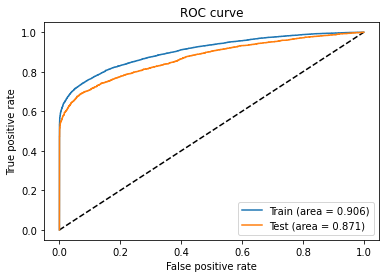

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test)[:,0]
y_pred_train = model.predict(X_train)[:,0]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train (area = {:.3f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

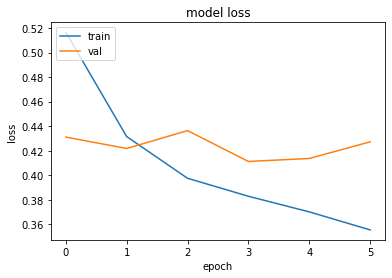

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
y_test

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [19]:
y_pred_test

array([0.17170903, 0.15752584, 0.9999765 , ..., 0.13661814, 0.99995244,
       0.4765883 ], dtype=float32)

In [ ]:
df.corr()

In [ ]:
diag = df["readmitted"]

In [ ]:
len(diag[diag == 1])

In [ ]:
len(diag[diag == 0])

In [ ]:
model.evaluate(X_test,y_test)